Populating the interactive namespace from numpy and matplotlib


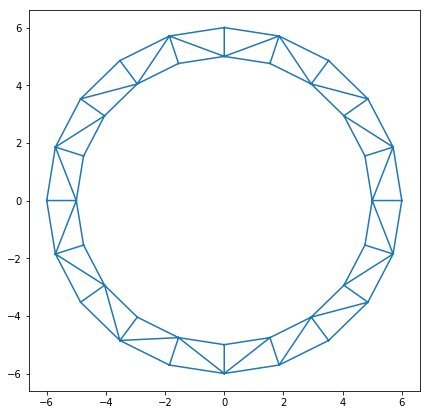

In [122]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize']=(7,7)

def get_radius(r):
    n_pts = 10
    step = 180/n_pts
    pts = []
    for i in range(n_pts+1):
        y =  r*np.cos(np.pi*i*step/180)
        x =  r*np.sin(np.pi*i*step/180)
        pts.append([x, y])
        pts.append([-x, y])
    return pts

def not_in_ring(pts):
    return (pts[0])**2+(pts[1])**2 >= 5**2

points = []
for r in range(5,7,1):
    points.extend(get_radius(r))

points = np.array(points)
tri = Delaunay(points)

index2point = lambda index: tri.points[index]
all_centers = index2point(tri.vertices)
outside = [not_in_ring(item.mean(axis=0)) for item in all_centers]
tri.vertices=tri.vertices[where(outside)]

plt.triplot(points[:,0], points[:,1], tri.vertices)
plt.show()
